# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

* Фильтр дискретного сигнала

$y_{n} = \sum_{k=0}^{N}c_{k}s_{n-k} + \sum_{k=1}^{M}d_{k}y_{n-k}$, где $s_{n}$ - входной сигнал, $y_{n}$ - выходной сигнал, n = 1,2,...,N
* Связь передаточной функции для круговой частоты и циклической:

$H(\omega)=H(2\pi f)=\tilde{H}(f)$

* Формула Эйлера:

$e^{i\phi} = cos(\phi) + isin(\phi)$  
$sin(\phi) = \frac{e^{i\phi} - e^{-i\phi}}{2i}$  
$cos(\phi) = \frac{e^{i\phi} + e^{-i\phi}}{2}$ 
* Квадратурная формула прямоугольников

$y_{n+1} = y_{n} + s_{n+0.5}$,  $y_{0}=0$
* Квадратурная формула трапеций

$y_{n+1} = y_{n} + \frac{1}{2}(s_{n} + s_{n+1})$,  $y_{0}=0$
* Квадратурная формула Симпсона

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_{n} + s_{n+1})$,  $y_{0}=0$
* Квадратурная формула интегрирования по правилу "$\frac{3}{8}$"

$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n-1} + 3s_{n} + 3s_{n+1} + s_{n+2}), y_{0}=0$  

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы
* Пусть входной сигнал $s_{n}$ :

$s_{n} = e^{iwn}$
* Передаточная функция ${H}(\omega)$ :

$y_{n} = H(\omega)s_{n} = H(\omega)e^{iwn}$
* Точное значение интеграла $e^{i\omega t}$:

 $\frac{e^{i\omega t}}{i\omega}$

### Первое задание
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def make_plot(values, freq, ymin, ymax, title): # построение графиков
  plt.figure(figsize=(10, 7))
  sns.set(style="whitegrid")
  plt.tight_layout()
  plt.gca().set_ylim([ymin, ymax])
  for graph in values:
      plt.plot(freq, graph["values"], label = graph["label"])
  plt.xlabel('$f$')
  plt.title(title)  
  plt.legend()
  plt.show

In [3]:
freq = np.linspace(0.0001, 0.5, 1000) # частоты

1.1. Формула прямоугольников  
$y_{n+1} = H(\omega)e^{i\omega n} + e^{i\omega(n+0.5)}$  
$y_{n+1} = H(\omega)e^{i\omega(n+1)}$  
$H(\omega)e^{i\omega n} + e^{i\omega(n+0.5)} = H(\omega)e^{i\omega(n+1)}$  
$H(\omega)= \frac{e^{i\omega(n+0.5)}}{e^{i\omega(n+1)} - e^{iwn}} = \frac{e^{i\omega n+0.5i\omega}}{e^{i\omega n+i\omega} - e^{i\omega n}} = $
$\frac{e^{i\omega n}e^{0.5i\omega}}{e^{i\omega n}e^{i\omega} - e^{i\omega n}} = \frac{e^{0.5i\omega}}{e^{i\omega} - 1} = \frac{1}{e^{0.5i\omega} - e^{-0.5i\omega}}$   
$H(\omega)=  \frac{1}{2isin(\frac{\omega}{2})}$  
$\tilde{H}(f)=  \frac{1}{2isin(\pi f)}$  
Отношение истинного и полученного в результате фильтрации значений:  
$\gamma = \frac{e^{i\omega n}}{2isin(\frac{\omega}{2})} * \frac{i\omega}{e^{i\omega n}} = \frac{\omega}{2sin(0.5\omega)}=
\frac{\pi f}{sin(\pi f)}$ 

In [4]:
h_rect = lambda f: np.imag(1 / 2*1j*np.sin(np.pi * f))
r_rect = lambda f: (np.pi * f) / np.sin(np.pi * f) 
h_rect_values = [h_rect(f) for f in freq]
r_rect_values = [r_rect(f) for f in freq]

1.2. Формула трапеций  
$y_{n+1} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})$  
$y_{n+1} = H(\omega)e^{i\omega(n+1)}$  
$H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)}) = H(\omega)e^{i\omega (n+1)}$  
$H(\omega)= \frac{0.5(e^{i\omega n} + e^{i\omega (n+1)})}{e^{i\omega(n+1)} - e^{i\omega n}} = \frac{0.5(e^{i\omega n} +e^{i\omega n} e^{i\omega w})}{e^{i\omega n+i\omega} - e^{i\omega n}} =$
$\frac{0.5(1 +e^{i\omega })}{e^{i\omega} - 1} = \frac{cos(0.5 \omega)}{2i sin(0.5 \omega)}$  
$\tilde{H}(f)=  \frac{cos(\pi f)}{2isin(\pi f)}$  
Отношение истинного и полученного в результате фильтрации значений:  
$\gamma = \frac{e^{i\omega n}cos(0.5 \omega)}{2i sin(0.5 \omega)} * \frac{i\omega}{e^{i\omega n}} = \frac{\omega cos(0.5\omega)}{2sin(0.5\omega)}= \frac{\pi f cos(\pi f)}{sin(\pi f)}$ 

In [5]:
h_tr = lambda f: np.imag((np.cos(np.pi *f) )/ (2*1j*(np.sin(np.pi * f))))
r_tr = lambda f: (np.pi * f * np.cos(np.pi * f)) / (np.sin(np.pi * f) )
h_tr_values = [h_tr(f) for f in freq]
r_tr_values = [r_tr(f) for f in freq]

1.3. Формула Симпсона  
$y_{n+1} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$  
$y_{n+1} = H(\omega)e^{i\omega (n+1)}$  
$H(\omega)e^{i\omega n} +\frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)}) = H(\omega)e^{i\omega (n+1)}$  
$H(\omega)= \frac{\frac{1}{3}(e^{iw(n-1)} + 4e^{iwn} + e^{i\omega (n+1)})}{e^{i\omega (n+1)} - e^{i\omega (n-1)}} =
 \frac{e^{i\omega n}(e^{-i\omega } + 4 + e^{i\omega })}{3e^{i\omega n}(e^{i\omega } - e^{-i\omega })} = $
$\frac{(e^{-i\omega } + 4 + e^{i\omega })}{3(e^{i\omega } - e^{-i\omega })}
= \frac{cos(\omega ) + 2}{3isin\omega} $   
$\tilde{H}(f)=\frac{cos(2\pi f) + 2}{3isin(2\pi f)} $  
Отношение истинного и полученного в результате фильтрации значений:  
$\gamma = \frac{(e^{i\omega n})(cos(\omega ) + 2)}{3isin\omega} * \frac{i\omega}{e^{i\omega n}} = \frac{(cos(\omega ) + 2)\omega}{3sin\omega}= \frac{(cos(2\pi f) + 2)2\pi f}{3sin(2\pi f)}$

In [6]:
h_simpson = lambda f: np.imag((np.cos(2*np.pi *f) + 2) / (3*1j*np.sin(2*np.pi * f)))
r_simpson = lambda f: ((np.cos(2*np.pi *f) + 2) *2*np.pi * f)/ (3*np.sin(2*np.pi * f))
h_simpson_values = [h_simpson(f) for f in freq]
r_simpson_values = [r_simpson(f) for f in freq]

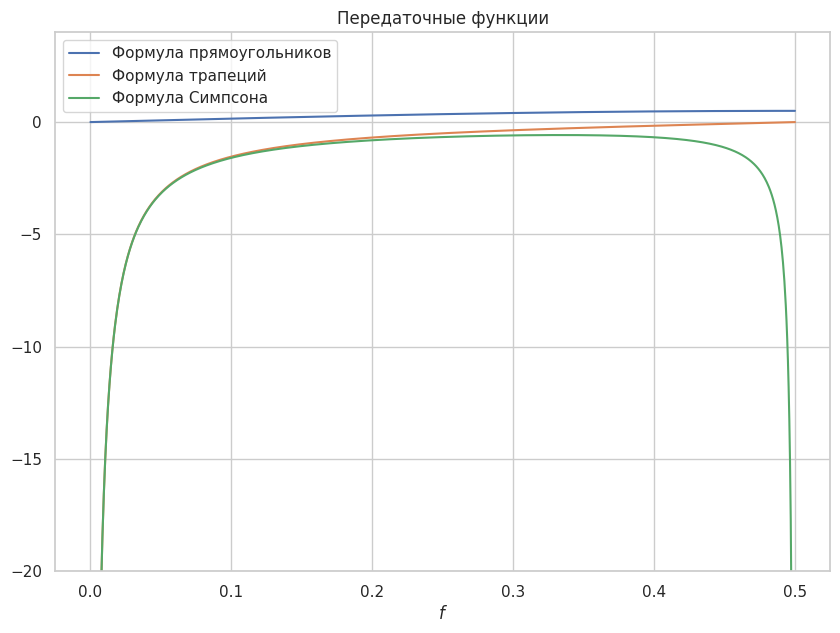

In [7]:
h_vals = [{"values": h_rect_values, "label": "Формула прямоугольников"}, {"values": h_tr_values, "label": "Формула трапеций"}, {"values": h_simpson_values, "label": "Формула Симпсона"}]
make_plot(h_vals, freq, -20, 4,"Передаточные функции")

Искажение вычисляемого сигнала частотой до 0.1 меньше всего у рекурсивного фильтра, соответствующего формуле прямоугольника, далее мнимая часть передаточной функции меньше всего у фильтра, соответствующего формуле трапеций (для сигналов с частотой $\geq$ 0.3). Мнимая часть передаточной функции фильтра формулы Симпсона стремится к $ -\infty$ для сигналов, чья f близка к 0 и к 0.5.

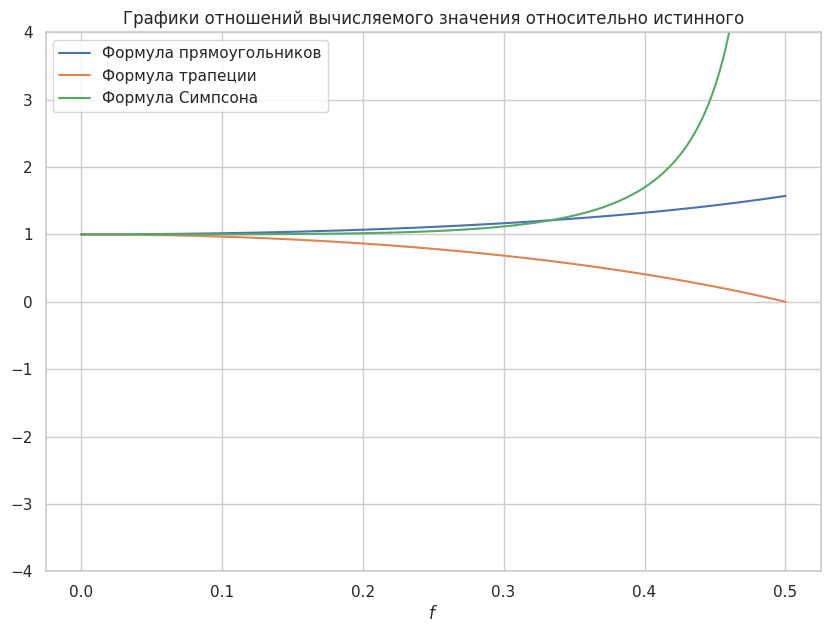

In [8]:
r_vals = [{"values": r_rect_values, "label": "Формула прямоугольников"}, {"values": r_tr_values, "label": "Формула трапеции"}, {"values": r_simpson_values, "label": "Формула Симпсона"}]
make_plot(r_vals, freq, -4, 4,  "Графики отношений вычисляемого значения относительно истинного")

По полученным графикам можно заметить, что фильтр, соответствующий формуле Симпсона, значительно увеличивает амплитуду высокочастотного сигнала, фильтр формулы прямоугольника увеличивает её в меньше мере, а фильтр, соответствующий формулам трапеции,  наоборот подавляет амплитуду высокочастотных сигналов

### Второе задание
Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8». Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.
Интегрирование «по правилу 3/8»  
$y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{iw(n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})$   
$y_{n+2} = H(\omega)e^{i\omega (n+2)}$   
$H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)}) = H(\omega)e^{i\omega (n+2)}$  
$H(\omega)= \frac{\frac{1}{8}(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})}{e^{i\omega (n+2)} - e^{i\omega (n-1)}} =
 \frac{(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})}{8e^{i\omega n}(e^{2i\omega } - e^{-iw})} = $ 
$\frac{cos(1.5\omega) + 3cos(1.5\omega)}{8isin(1.5\omega)}$  
$\tilde{H}(f)=  \frac{cos(3\pi f) + 3cos(3\pi f)}{8isin(3\pi f)}$  
Отношение истинного и полученного в результате фильтрации значений:  
$\gamma = \frac{(cos(1.5\omega) + 3cos(1.5\omega))\omega}{8sin(1.5\omega)} = \frac{\pi f(cos(3\pi f) + 3cos(3\pi f))}{8sin(3\pi f)}$ 

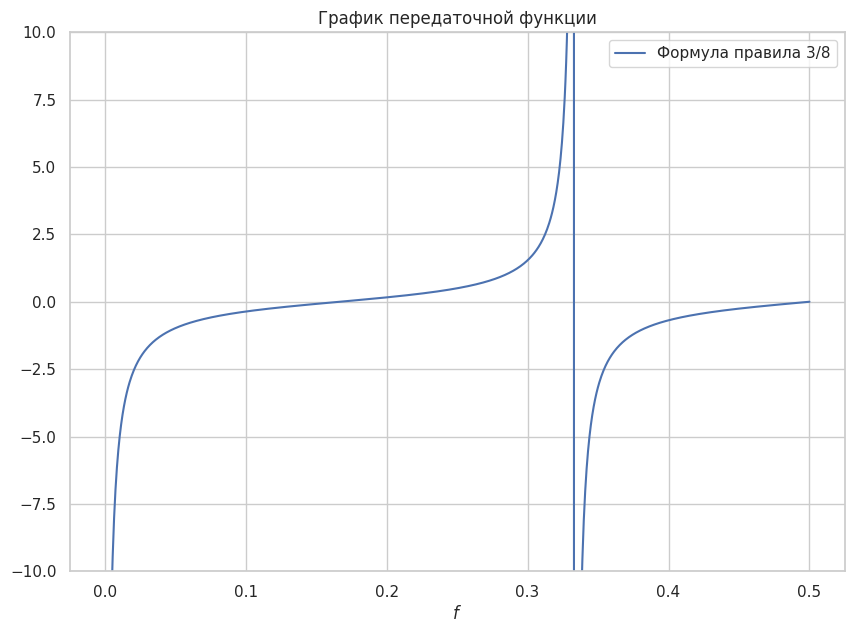

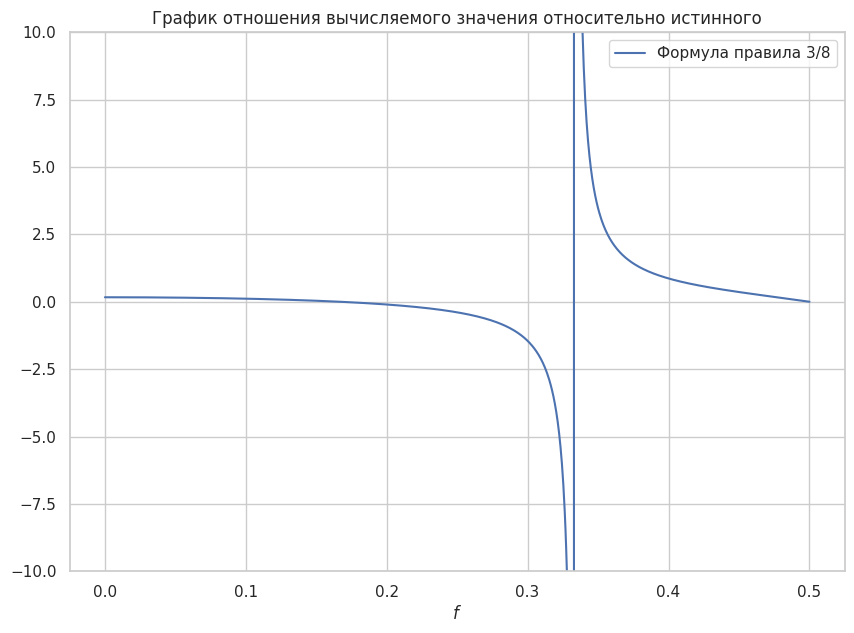

In [9]:
h_three8 = lambda f: np.imag( (np.cos(3*np.pi *f) + 3*(np.cos(3*np.pi *f))) / (8*1j*np.sin(3*np.pi * f)))
r_three8 = lambda f: ((np.cos(3*np.pi *f) + 3*(np.cos(3*np.pi *f))) * np.pi * f)/ (8*np.sin(3*np.pi * f))
h_three8_values = [h_three8(f) for f in freq]
make_plot([{"values": h_three8_values, "label": "Формула правила 3/8"}], freq, -10, 10,"График передаточной функции")
r_three8_values = [r_three8(f) for f in freq]
make_plot([{"values": r_three8_values, "label": "Формула правила 3/8"}], freq, -10, 10, "График отношения вычисляемого значения относительно истинного")

И у графика передаточной функции фильтра формулы правила $\frac{3}{8}$, и у графика отношения вычисляемого значения к истинному наблюдаются асимптоты в точке 0.33, что приводит к искажению сигналов. Сигналы, чьи частоты близки к этой точке усиливаются, остальные подавляются (отношение близко к нулю)

### Третье задание
Все изученные фильтры тем или иным образом изменяли входящий сигнал. По графикам передаточных функций у всех фильтров наблюдается сильное изменение сигнала в точке 0. Тем не менее, исходя из графиков отношений вычисляемых значений к истинным, фильтры, соответствующие формулам прямоугольника, трапеции и формуле Симпсона, не изменяли амплитуду низкочастотных сигналов. Амплитуда высокочастотных сигналов заметно увеличивается фильтром формулы Симпсона, немного фильтром формулы прямоугольников и уменьшается фильтром формулы трапеций.

Наиболее отличающийся фильтр - фильтр, соответствующий формуле интегрирования по правилу "$\frac{3}{8}$". Он подавляет большинство сигналов(отношение амплитуды близко к нулю), кроме сигналов, чья частота близка по значению к 0.33, также в этой точке велико значение передаточной функции.

## Выводы
Были получены формулы для передаточных функций рекурсивных фильтров, соответсвующим различным квадратурным формулам, построены графики $\tilde{H}(f)$, отношений вычисляемого значения к истинному. Для всех фильтров проинтерпретированы частотные свойства передаточных функций, визуализировано влияние фильтров на сигналы различных частот. ПФроведён сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.